In [32]:
import cv2
from google.colab.patches import cv2_imshow

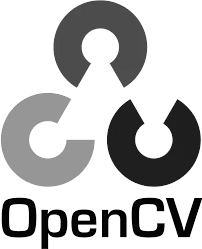

In [33]:
img=cv2.imread("opencv.png")
imgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(imgray)

Drawing contours

In [34]:
_,thr=cv2.threshold(imgray,127,255,0)
contours,heirchry=cv2.findContours(thr,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print(str(len(contours)))

10


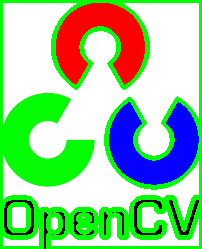

In [35]:
#Drawing contours
cv2.drawContours(img,contours,-1,(0,255,0),3)
cv2_imshow(img)

Drawing contours and detecting shapes

In [36]:
img2=cv2.imread("shapess.png")
im2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
_,thres=cv2.threshold(im2gray,240,255,cv2.THRESH_BINARY)
con,hei=cv2.findContours(thres,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [37]:
for c in con:
  approx=cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)
  cv2.drawContours(img2,[approx],0,(0,255,255),5)
  x=approx.ravel()[0]
  y=approx.ravel()[1]
  if len(approx)==3:
    cv2.putText(img2,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255))
  elif len(approx)==4:
    x,y,w,h=cv2.boundingRect(approx)
    aspectRatio=float(w)/h
    print(aspectRatio)
    if (aspectRatio>=0.95 and aspectRatio<=1.05):
      cv2.putText(img2,"Square",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    else:  
      cv2.putText(img2,"Rectangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255)) 
  elif len(approx)==5:
    cv2.putText(img2,"Pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0)) 
  elif len(approx)==6:
    cv2.putText(img2,"Hexagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0))  
  elif len(approx)==10:
    cv2.putText(img2,"Star",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
  else:
    cv2.putText(img2,"Circle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    

1.4385026737967914
1.265625


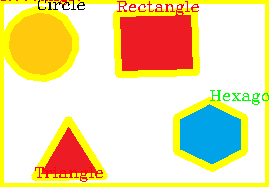

In [38]:
cv2_imshow(img2) 